# Part I : Board Game Publications Over The Years

This notebook covers the amount of board game releases over time on a per year and cumulative basis.

## Disclaimer

The used board game data is from 1990 to 2018 and has been collected on the 10th of May 2018. Only games with at least 20 ratings on BGG have been included. Expansions have been excluded. This holds true for every notebook in this series.

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sqlalchemy import create_engine

engine = create_engine("sqlite:///../data/database/data_2018-05-10.db")

To get the number of releases per year we can simply group the board games by `year_published`. And to get the cumulative counts we can use the `cumsum()` method on the pandas `Series`.

In [2]:
published_df = pd.read_sql("select count(id) as count, year_published as year from boardgames where year_published < 2018 group by year_published;", engine)
published_df["cumulative"] = published_df["count"].cumsum()
published_df.head()

,count,year,cumulative
0,162,1990,162
1,190,1991,352
2,220,1992,572
3,195,1993,767
4,199,1994,966


In [3]:
# Get the points to mark specific dates
bgg_df = published_df[published_df["year"] == 2000]
kickstarter_df = published_df[published_df["year"] == 2009]

## Board Game Publications Per Year And Over Time

There has been a significant growth regarding the amount of published board games per year. Just in 2016 there are 1225 publications!

One important factor is the Internet that made it a lot easier for board games to reach a wider audience. In 2000 *BoardGameGeek* was launched, a website that serves as a database and discussion forum for board games.

Another important event is the launch of the crowdfunding platform *Kickstarter* that plays a significant role in the rise of board gaming. Kickstarter will be discussed in another notebook.

The immediate consequence from having an increasing amount of publications per year is the rapid growth of available games to choose from. Choosing which game to buy next is harder than ever.


Text(2002.3,6000,'Cumulative')

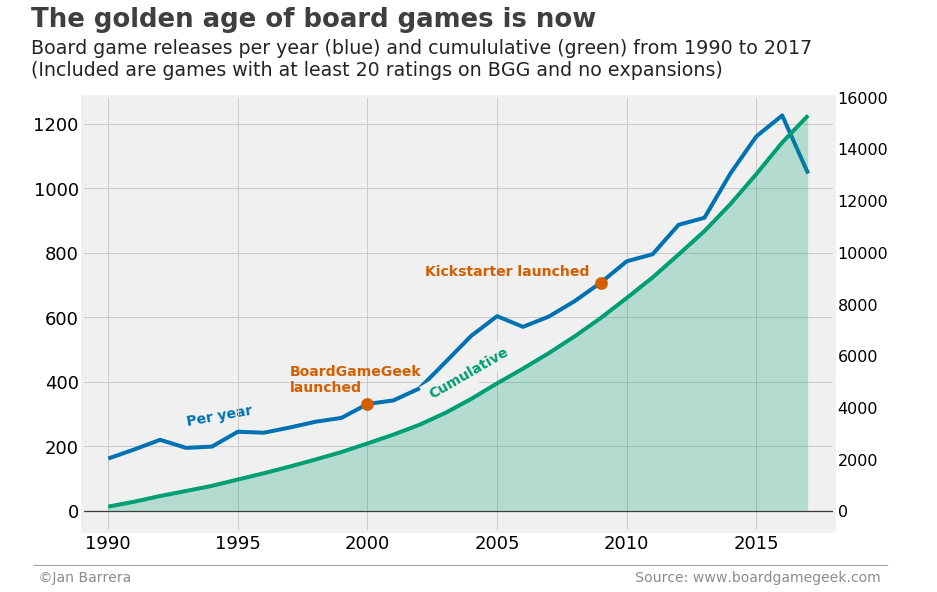

In [4]:
# Plotting the releases per Year
blue = [[0, 114/255, 178/255]]
ax = published_df.plot("year", "count", color=blue, figsize=(12, 8), fontsize=16, legend=False)

# Axis Settings
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=18)
ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)
ax.set_xlim(left=1989, right=2018)

# Labels
ax.text(x=1993, y=300, s="Per year", color=blue[0], weight="bold", rotation=10,
       backgroundcolor="#f0f0f0", fontsize=14, zorder=0)

# Special Points in time
special_color = [213/255, 94/255, 0]
ax.scatter(bgg_df["year"], bgg_df["count"], s=150, c=special_color, zorder=6)
plt.text(1997, 370, "BoardGameGeek\nlaunched", fontsize=14, color=special_color, weight="bold")
ax.scatter(kickstarter_df["year"], kickstarter_df["count"], s=150, c=special_color, zorder=6)
plt.text(2002.2, 730, "Kickstarter launched", fontsize=14, color=special_color, weight="bold")

# Title and subtitle
ax.text(x=1987, y= 1500, s="The golden age of board games is now", fontsize=26, weight="bold",
       alpha=0.75)
ax.text(x=1987, y=1350, s="Board game releases per year (blue) and cumululative (green) from 1990 to 2017\n" +
        "(Included are games with at least 20 ratings on BGG and no expansions)",
       fontsize=19, alpha=0.85)

# Signature bar
ax.text(x=1987.1, y=-160, s="___________________________________________________________________________________________________________________________________________________________________________",
       color="grey", alpha=0.9)
ax.text(x=1986.1, y=-220, s="       ©Jan Barrera                                                                                                                Source: www.boardgamegeek.com           ",
       fontsize=14, color="grey", alpha=0.9)

# Plotting the cummulative number of releases
ax2 = ax.twinx()
bluegreen = [[0, 158/255, 115/255]]
published_df.plot("year", "cumulative", color=bluegreen, figsize=(12, 8), fontsize=16, legend=False, ax=ax2)
ax2.grid(b=None)
ax2.fill_between(published_df["year"], 0, published_df["cumulative"], facecolor=bluegreen[0], alpha=0.25)

# Labels for the second axis
ax2.text(x=2002.3, y=6000, s="Cumulative", color=bluegreen[0], weight="bold", rotation=30,
       backgroundcolor="#f0f0f0", fontsize=14, zorder=0)

